### Countdown Numbers game
### $What$ $is$ $a$ $Countdown$ $Numbers$ $game$?
Countdown Numbers game is a British TV game show. One of its rounds is called the Numbers round where the contestants choose 6 number cards out of the possible 24. The numbers are arranged in two categories: 20 small numbers ( two sets of 1 to 10) and 4 large numbers (25,50,75,100). After choosing, a random 3-digit number is generated, and the contestants have to work out a calculation that results in that number or as close to it as possible by using the previously selected numbers.  However, there are a few rules that have to be followed: <br>
•    Each of the 6 selected numbers can be used once <br>
•    Only the four basic operations can be used as many times as we want as long as the result doesn't lead to negative number for example $25 - 50$. The operations are: addition, subtraction, multiplication and division <br>
Additionally,  not all 6 numbers have to be used. <br>
•    We can do division as long as it lead to positive integer for example $\frac{50}{25}$, what is not allowed is division that leads to a fraction for example $\frac{50}{6}$ which is $8.33333$

In [1]:
#Permutations and combinations
import itertools as it

In [2]:
#Random number generator
import random

In [3]:
#Operators as function
import operator

In [4]:
#We need the time module to count down 30 sec
import time 

##### We're creating a function which is picking (generating) randomly playing numbers and a target numbers from the largenumbers and the small numbers and its returning them so we can use it later

In [5]:
#Randomly generate a game
def new_numbers_game(numOfLargeNum=None):
  """ Returns six numbers and a target number representing a Countdown numbers game. """
  # If numOfLargeNum in None, randomly pick value between 0 and 4 inclusive.
  if numOfLargeNum is None:
    # Randomly set the value.
    numOfLargeNum = random.randrange(0, 5)
  
  # Select random large numbers.
  large_rand = random.sample([25, 50, 75, 100], numOfLargeNum)
  # Select random small numbers.
  small_rand = random.sample(list(range(1, 11)) * 2, 6 - numOfLargeNum)
  # The playing numbers.
  play_numbers = large_rand + small_rand

  # Select a target number.
  target = random.randrange(101, 1000)

  # Return the game.
  return play_numbers, target

In [6]:
play_numbers, target = new_numbers_game()
play_numbers, target

([25, 4, 5, 6, 7, 2], 823)

# $Reverse$ $Polish$ $Notation$ and $Binary$ $Expression$ $Tree$ (Patterns)
***
<div>
<center>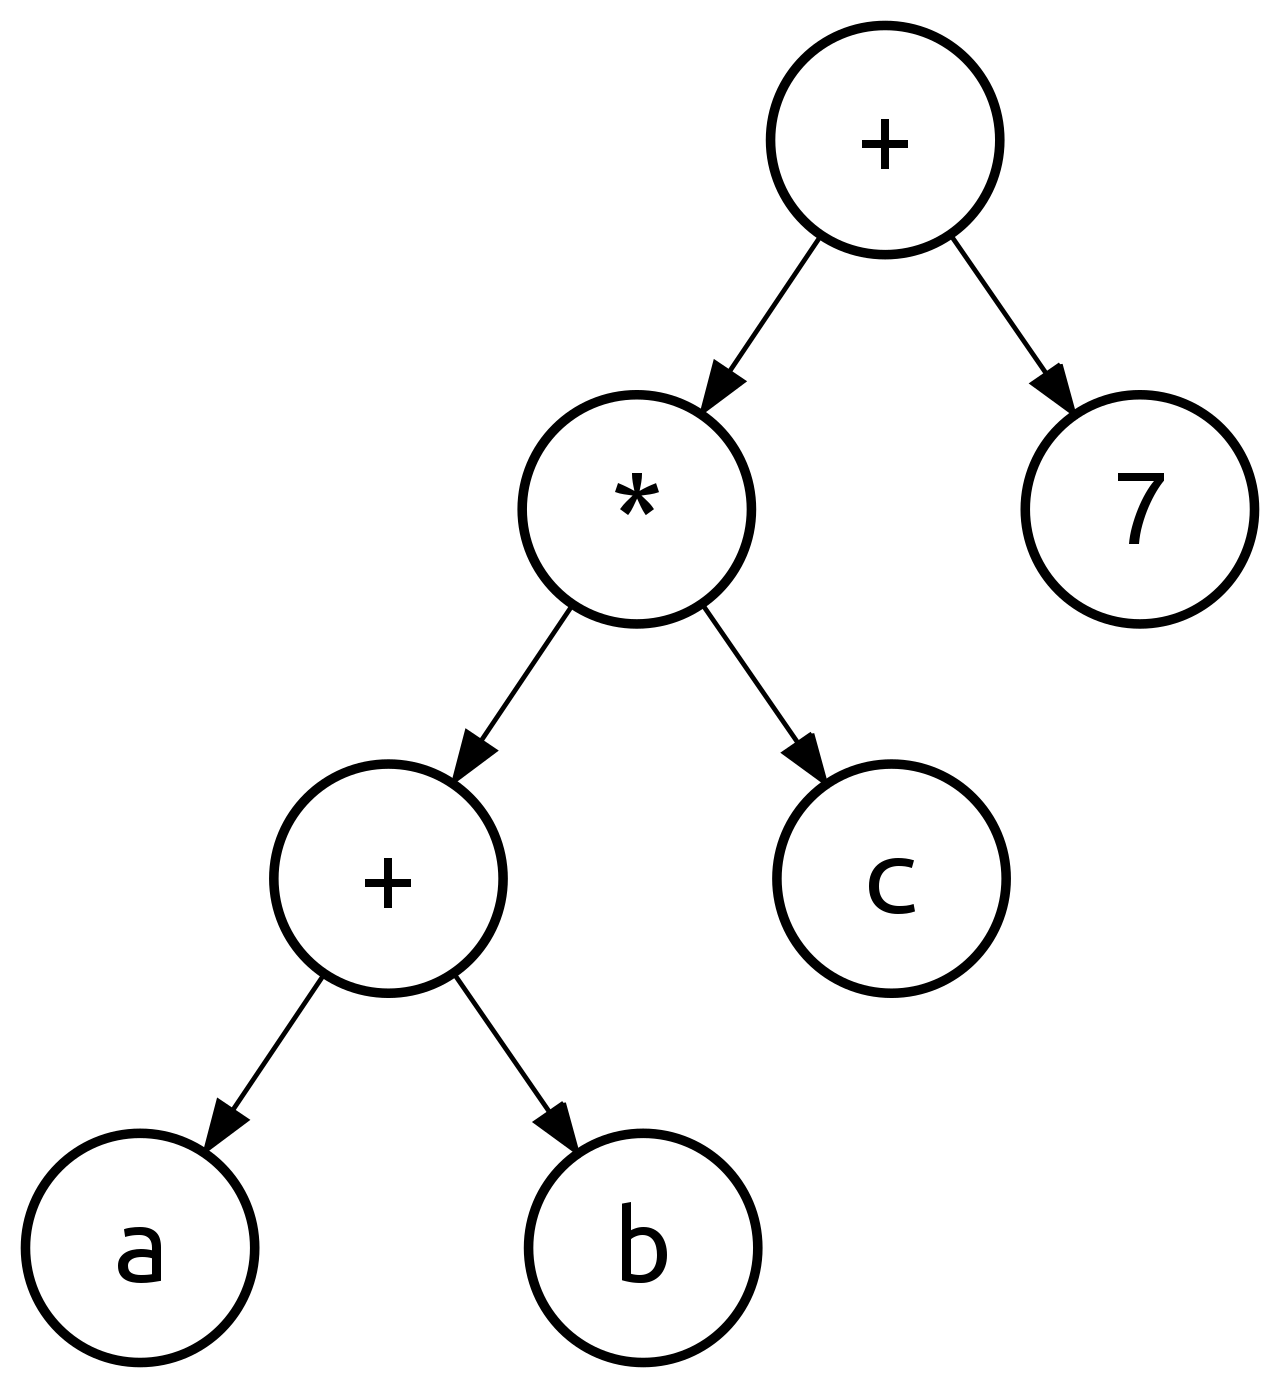</center>
</div>

# $What$ $is$ [$RPN$](https://en.wikipedia.org/wiki/Reverse_Polish_notation)) ?

##### Reverse Polish notation (RPN) is a method for conveying mathematical expressions without the use of separators such as brackets and parentheses. In this notation, the operators follow their operands, hence removing the need for brackets to define evaluation priority. We're going to use the RPN in the below patterns function as it gonna make our work easier by not having to have the brackets in your expressions.
##### Example of RPN is provided below
<div>
<center>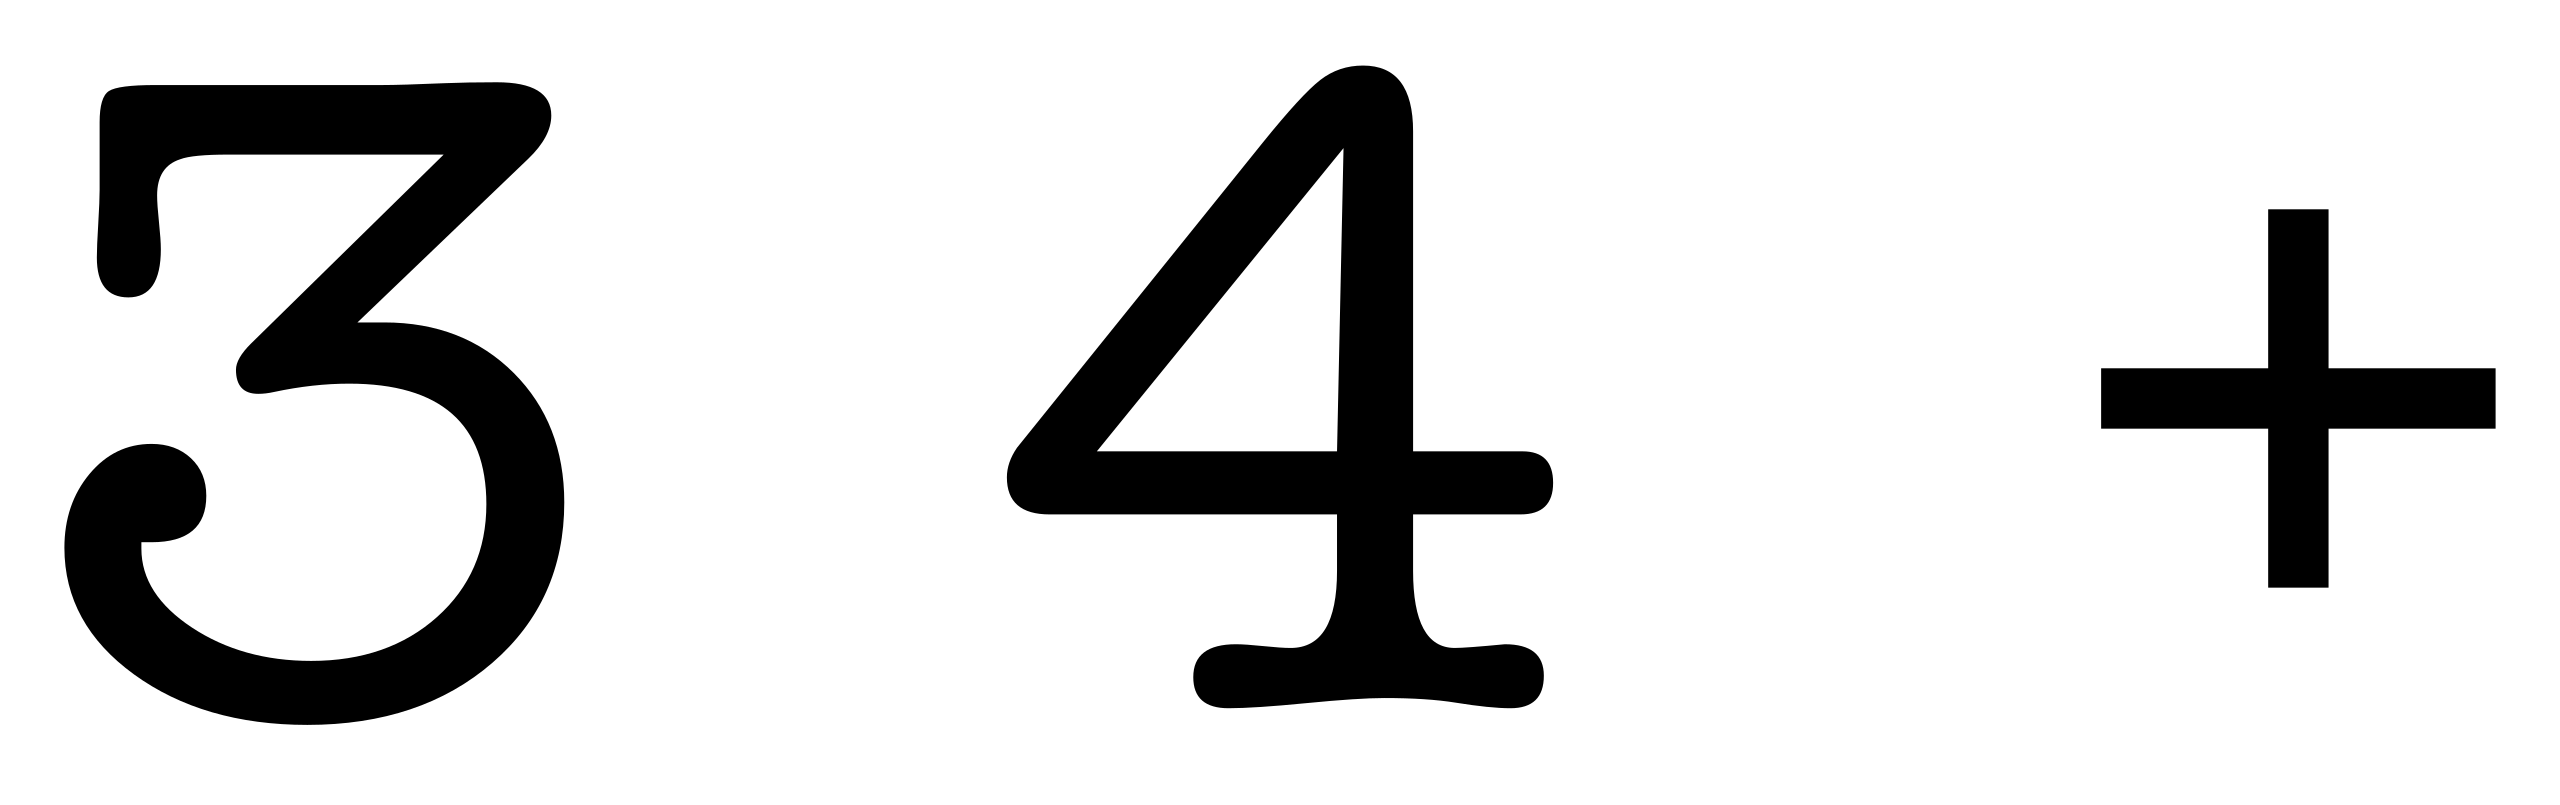</center>
</div>

# $What$ $is$ [$Binary$ $Expression$ $Tree$](https://en.wikipedia.org/wiki/Binary_expression_tree)  ?
##### "A binary expression tree is a specific kind of a binary tree used to represent expressions. Two common types of expressions that a binary expression tree can represent are algebraic and boolean. These trees can represent expressions that contain both unary and binary operators."
##### To create all the possible solutions we can consider every possible expression(solution) a binary expression tree or we can call it a pattern. You can see an example of the binary tree in the above image.
***

In [7]:
#Create a binary expression tree structore
# Give all 2-partitions of a list
# where each sublist has  one element.
def patterns(numbers, operators):
  # Check if there is no way to partition further.
  if len(numbers) == 1:
    yield numbers
  # Loop through all the ways to partition L into two non-empty sublists.
  for i in range(1, len(numbers)):
    # Slice the list using i.
    for left, right in it.product(patterns(numbers[:i], operators[1:i]), patterns(numbers[i:], operators[i:])):
      # Yield the next operator applied to the sublists.
      yield [*left, *right, operators[0]]

Below code represent all the different patterns for given numbers, and operators

In [8]:
# An example list of six numbers.
numbers = [100, 75, 10, 4, 2, 1]
# Example operators.
# operators = [operator.add, operator.mul, operator.sub, operator.add, operator.add]
operators = ['+', '*', '-', '+', '+']
# Using eval, which mightn't be great.
for i in patterns(numbers, operators):
  print(i)

[100, 75, 10, 4, 2, 1, '+', '+', '-', '*', '+']
[100, 75, 10, 4, 2, '+', 1, '+', '-', '*', '+']
[100, 75, 10, 4, '+', 2, 1, '+', '-', '*', '+']
[100, 75, 10, 4, 2, '+', '+', 1, '-', '*', '+']
[100, 75, 10, 4, '+', 2, '+', 1, '-', '*', '+']
[100, 75, 10, '-', 4, 2, 1, '+', '+', '*', '+']
[100, 75, 10, '-', 4, 2, '+', 1, '+', '*', '+']
[100, 75, 10, 4, '+', '-', 2, 1, '+', '*', '+']
[100, 75, 10, '+', 4, '-', 2, 1, '+', '*', '+']
[100, 75, 10, 4, 2, '+', '+', '-', 1, '*', '+']
[100, 75, 10, 4, '+', 2, '+', '-', 1, '*', '+']
[100, 75, 10, '+', 4, 2, '+', '-', 1, '*', '+']
[100, 75, 10, 4, '+', '+', 2, '-', 1, '*', '+']
[100, 75, 10, '+', 4, '+', 2, '-', 1, '*', '+']
[100, 75, '*', 10, 4, 2, 1, '+', '+', '-', '+']
[100, 75, '*', 10, 4, 2, '+', 1, '+', '-', '+']
[100, 75, '*', 10, 4, '+', 2, 1, '+', '-', '+']
[100, 75, '*', 10, 4, 2, '+', '+', 1, '-', '+']
[100, 75, '*', 10, 4, '+', 2, '+', 1, '-', '+']
[100, 75, 10, '-', '*', 4, 2, 1, '+', '+', '+']
[100, 75, 10, '-', '*', 4, 2, '+', 1, '+

***
##### Below you can find an evalution function which is getting rpn line as input and calculate it and return it.
##### There are a few restrictions applied to that functions such as:
##### As per the rules of the game I applied a few restrictions to the function below and they are as followed:
1.   If the Operator is addition or multiplication calculate it as the order doesn't matter. For example 2+1 or 1+2, its the same thing.
2.   If the Operator is subtraction and the left number - the right number is greater then 0 then continue as per rules above
3.   if the operator is division check if the right number is not 0 as we cannot have a division by 0 and check if the left modules right number is == 0 as we cannot have a fractions either

In [9]:
# Evaluate RPN expression.
def eval_rpn(rpn):
  # A stack.
  stack = []
  # Loop through rpn an item at a time.
  for i in rpn:
    # Check if it's a number.
    if isinstance(i, int):
      # Append to the stack.
      stack = stack + [i]
    else:
      # Pop from stack twice.
      right = stack[-1]
      stack = stack[:-1]
      left = stack[-1]
      stack = stack[:-1]
      # Push operator applied to stack elements.
      #else if operator is addition or multiplication
      if(i == operator.add or i== operator.mul):      
        stack = stack + [i(left, right)]
      #else if operator is substraction
      elif (i == operator.sub):
        if(left - right > 0):
            stack = stack + [i(left, right)]
        else:
            stack = stack + [0]
            continue
      #If operator is divison
      elif(i == operator.truediv):
        if(right and left % right == 0):     
            stack = stack + [i(left, right)]
        else:
            stack = stack + [0]
            
  # Should only be one item on stack.
  return stack[0]

In [10]:
# Example operators.
ops = [operator.add, operator.mul, operator.sub, operator.truediv]

In [11]:
target 

823

###### In the function below we are getting all of the products for the operators,
###### all the permutations of the numbers and combine it into a product and then we loop through different patterns based on those inputs. 
###### Afterwards we are calling the function from above eval_rpn to calculate the actual rpn and then compare it to the target. 
###### If we got the number of specified possible answer or answers or the time limit runs out of 30 sec the function is breaking out of the outer loop.

In [12]:

def checkPosibles(play_numbers, ops, num):
    found = 0
    timeout = time.time() + 30;
    for play_num, opers in it.product(it.permutations(play_numbers), it.product(*([ops] * 5))):
        for i in patterns(play_num, opers):
         #if(eval_rpn(play_numbers) == target):
            if(eval_rpn(i) == target):
                found +=1
                print("Solution ",found,eval_rpn(i), i)
        if(time.time() >= timeout):
            print("No solution found for 30 sec")
            break
        if(found == num):
            break

###### We can pass the playing numbers, the operators and the number of the solutions we want as parameters into the CheckPossibles function
###### Feel free to download and mess around with the parameters to see what the outcome will be

In [13]:
checkPosibles(play_numbers, ops, 3)

Solution  1 823 [25, 4, 5, <built-in function mul>, 6, <built-in function add>, 7, <built-in function add>, <built-in function mul>, 2, <built-in function sub>]
Solution  2 823 [25, 4, 5, <built-in function mul>, 6, 7, <built-in function add>, <built-in function add>, <built-in function mul>, 2, <built-in function sub>]
Solution  3 823 [25, 4, 5, <built-in function mul>, 7, <built-in function add>, 6, <built-in function add>, <built-in function mul>, 2, <built-in function sub>]


###### As you can see I am using the itertools module that is provided from python as the goal of that assignment was to make the code as functional as possible
###### Also the itertools is a great module which provides a lot of functionality such as map, filters, reducers, permutations, combinations, combinations with replacements, products and so on.
###### It depend what exactly you are trying to achieve I highly recommend you to check it out. 
***
# $Lets$ $check$ $what$ $the$ $size$ $complexity$ $and$ $time$ $complexity$ $for$ $some$ $of$ $the$ $components$ $of$ $the$ $game$ $are$:

##### Time complexity:
##### product() is $O(m*n)$, where m and n are the sizes of the two lists.
##### permutations() You can iterate over $N!$ permutations, so time complexity to complete an iteration is $O(N!)$.
##### patterns function has a nested for loop which most often can be interpreted as $O(n²)$ complexity

In [14]:
# The Number of combinations of 5 operators with replacement is:
4**5

1024

In [15]:
# The number of permutations of playing numbers is.
import math
math.factorial(6)

720

In [16]:
# Lets multiply the numbers of combinations by the numbers of permutation to see how many possible solutions we can have
4**5 * math.factorial(6)

737280

##### As we can see above the size of the problem is $737280$ which is quite a lot, if we do not use effient tools such as the itertools, or appropriate expressions like the binary expression tree. We will strugle with displaying a possible solution under 30 sec.

# $Thanks$ $for$ $reading$!


***

# Refrences
***
1. Real Python docs: [Itertools](https://realpython.com/python-itertools/)
2. Wikipedia: [Binary Expression Tree](https://en.wikipedia.org/wiki/Binary_expression_tree)
3. Lab Video: [Countdown Numbers Simulation](https://web.microsoftstream.com/video/a3a01a62-d0be-4779-ab87-e530bda88ad9)
4. Wikipedia:[Reverse Polish notation](https://en.wikipedia.org/wiki/Reverse_Polish_notation)
5. Stackoverflow: [Generating all possible "unique" RPN expressions](https://stackoverflow.com/questions/54384059/generating-all-possible-unique-rpn-reverse-polish-notation-expressions)
6. Lab Video: [Permutations with Subselections](https://web.microsoftstream.com/video/8b97b8b1-1231-44a9-9df8-b7a7346549f7)
7. softwareengineering: [What is the time complexity of permutations?](https://softwareengineering.stackexchange.com/questions/336881/what-is-the-time-complexity-of-permutations)
8. Lab Video: [Permutations, Combinations, and Operators](https://web.microsoftstream.com/video/8551ceef-c050-4935-9546-a4344a029e10)
9. Pythonpool: [The A-Z of Python’s itertools.product() Method](https://www.pythonpool.com/pythons-itertool-product/#:~:text=Time%20complexity,-The%20time%20complexity&text=product()%20is%20O(m,sizes%20of%20the%20two%20lists.)
8. Lab Video: [Countdown Numbers Game Solutions Online](https://web.microsoftstream.com/video/f325c7ce-6826-45a7-b54a-f7f112aff03f)
9. Lab Video: [Countdown Binary Trees](https://web.microsoftstream.com/video/fcc7d635-d311-4eae-8f9f-5fa0c58007bd)
10. Lab Video: [Coding the Partitions](https://web.microsoftstream.com/video/d05e9aee-c8e2-4182-ab69-56cdd59bcd29)
11. Lab Video: [Functional Ideas](https://web.microsoftstream.com/video/cb094c75-8cff-40fb-9150-51a133d481ac)



